<a href="https://colab.research.google.com/github/dinaOuahbi/Some_Data_Analysis/blob/main/EDA_WITH_TIME_SERIES_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

- EDA WITH TIME SERIES DATA
  - PANDAS DATA READER
  - DATA TIME INDEX
  - TIME RESAMPLE
  - TIME SHIFT
  - MEAN ROLING AND EXPANDING


Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame. Currently the following sources are supported

In [2]:
!pip install pandas-datareader

In [76]:
# https://stackoverflow.com/questions/17001389/pandas-resample-documentation
'''
B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds
'''

'\nB         business day frequency\nC         custom business day frequency (experimental)\nD         calendar day frequency\nW         weekly frequency\nM         month end frequency\nSM        semi-month end frequency (15th and end of month)\nBM        business month end frequency\nCBM       custom business month end frequency\nMS        month start frequency\nSMS       semi-month start frequency (1st and 15th)\nBMS       business month start frequency\nCBMS      custom business month start frequency\nQ         quarter end frequency\nBQ        business quarter endfrequency\nQS        quarter start frequency\nBQS       business quarter start frequency\nA         year end frequency\nBA, BY    business year end frequency\nAS, YS    year start frequency\nBAS, BYS  business year start frequency\nBH        business hour frequency\nH         hourly frequency\nT, min    minutely frequency\nS         secondly frequency\nL, ms     milliseconds\nU, us     microseconds\nN         nanoseconds\n'

In [5]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [8]:
#pdr.get_data_yahoo('TSLA')

In [17]:
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,49.633999,49.672001,48.402000,49.245998,49.245998,57304000
2017-02-28,48.838001,50.200001,48.779999,49.998001,49.998001,30390500
2017-03-01,50.835999,50.970001,49.821999,50.004002,50.004002,24047500
2017-03-02,49.942001,50.655998,49.653999,50.096001,50.096001,16759000
2017-03-03,50.147999,50.380001,49.799999,50.313999,50.313999,14597000


In [18]:
df.shape

(1259, 6)

In [19]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-17,913.260010,918.500000,874.099976,876.349976,876.349976,18392800
2022-02-18,886.000000,886.869995,837.609985,856.979980,856.979980,22710500
2022-02-22,834.130005,856.729980,801.099976,821.530029,821.530029,27762700
2022-02-23,830.429993,835.299988,760.559998,764.039978,764.039978,31752300
2022-02-24,700.390015,802.479980,700.000000,800.770020,800.770020,44876700


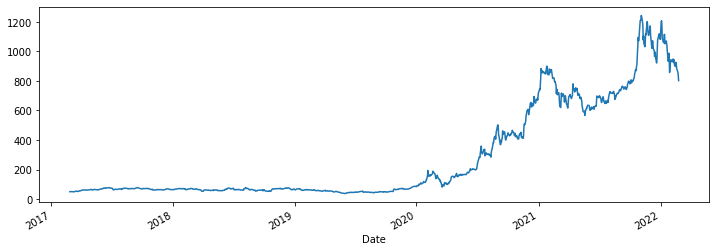

In [20]:
df['High'].plot(figsize=(12,4))

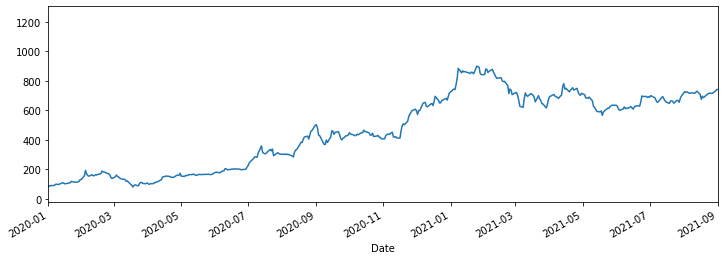

In [21]:
# slimit and yimit
df['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

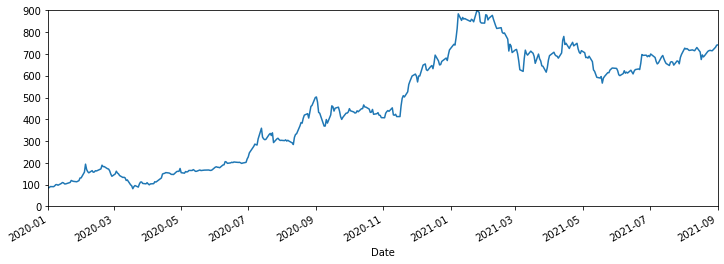

In [22]:
# slimit and yimit
df['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

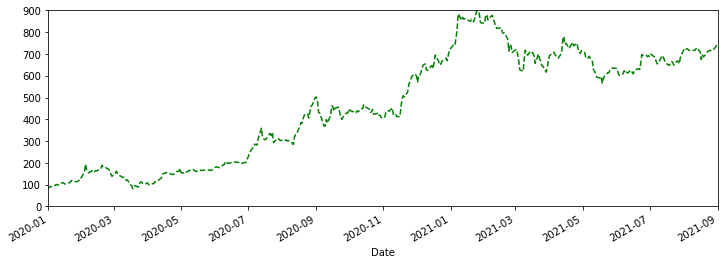

In [23]:
# slimit and yimit and coloring and line style
df['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [32]:
index = df.loc['2020-01-01':'2021-09-01'].index
share_open = df.loc['2020-01-01':'2021-09-01']['Open']

In [29]:
#subplot
import matplotlib.pyplot as plt
%matplotlib inline

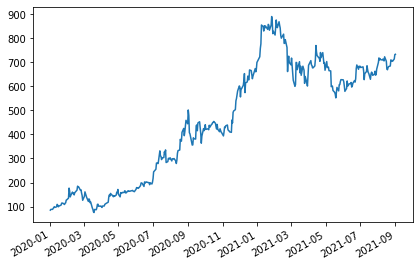

In [36]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() #preventing overlaping
axis.plot(index, share_open)

In [37]:
## Daate index

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-02-27 to 2022-02-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.1 KB


In [40]:
df.reset_index().info() #0   Date       1259 non-null   datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [41]:
# if 'date' is an object
############## pd.to_datetime(df['Date'])
## set index('Date', drop=True)


In [42]:
# datetime
datetime(2020, 12, 21)

datetime.datetime(2020, 12, 21, 0, 0)

In [43]:
datetime.now()

datetime.datetime(2022, 2, 25, 14, 4, 32, 795930)

In [45]:
def add_num(num1, num2):
  return num1+num2

In [47]:
start_time = datetime.now()
num1=20
num2=21
for i in [1,2,3,4,5]:
  print(
      add_num(num1, num2)
  )
end_time = datetime.now()
print(
    end_time-start_time
)

41
41
41
41
41
0:00:00.011740


In [52]:
date = datetime(2020, 11, 21)
date

datetime.datetime(2020, 11, 21, 0, 0)

In [53]:
date.date()

datetime.date(2020, 11, 21)

In [54]:
date.weekday()

5

In [55]:
date.year

2020

In [56]:
date.month

11

Time resampling

In [57]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,49.633999,49.672001,48.402000,49.245998,49.245998,57304000
2017-02-28,48.838001,50.200001,48.779999,49.998001,49.998001,30390500
2017-03-01,50.835999,50.970001,49.821999,50.004002,50.004002,24047500


In [59]:
df.resample(rule='A').min() # min of each variable for every year (last day in every year)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,48.838001,49.299999,48.402000,48.737999,48.737999,14597000
2018-12-31,50.556000,52.066002,48.917999,50.112000,50.112000,15403500
2019-12-31,36.220001,37.335999,35.397999,35.793999,35.793999,12328000
2020-12-31,74.940002,80.972000,70.101997,72.244003,72.244003,17357700
2021-12-31,552.549988,566.210022,539.489990,563.000000,563.000000,9800600
2022-12-31,700.390015,802.479980,700.000000,764.039978,764.039978,16909700


In [60]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,77.337997,77.921997,75.870003,77.000000,77.000000,98957000
2018-12-31,75.000000,77.491997,73.424004,75.914001,75.914001,168248500
2019-12-31,87.000000,87.061996,85.269997,86.188004,86.188004,150030500
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,304694000
2021-12-31,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,89396500
2022-12-31,1189.550049,1208.000000,1136.040039,1199.780029,1199.780029,50521900


In [61]:
type(
    df.resample(rule='A').min()
)

pandas.core.frame.DataFrame

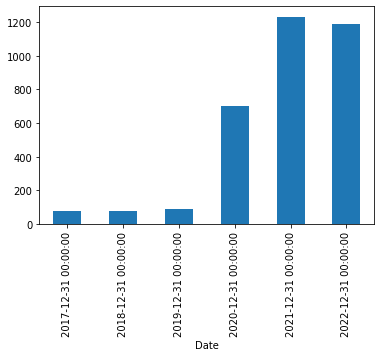

In [63]:
# year and fraequency
df.resample(rule='A').max()['Open'].plot(kind='bar')

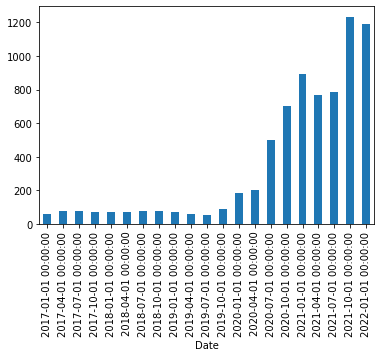

In [65]:
# quaterly start fre
df.resample(rule='QS').max()['Open'].plot(kind='bar')

In [67]:
# BUSINESS AND FREQ
df.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,77.337997,77.921997,75.870003,77.000000,77.000000,98957000
2018-12-31,75.000000,77.491997,73.424004,75.914001,75.914001,168248500
2019-12-31,87.000000,87.061996,85.269997,86.188004,86.188004,150030500
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,304694000
2021-12-31,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,89396500
2022-12-30,1189.550049,1208.000000,1136.040039,1199.780029,1199.780029,50521900


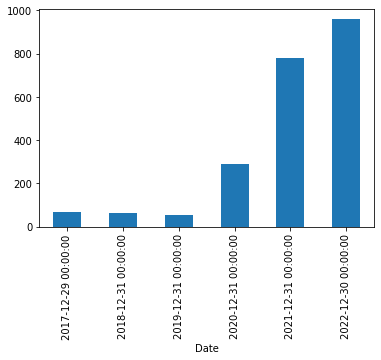

In [71]:
df['Open'].resample(rule='BA').mean().plot(kind='bar')

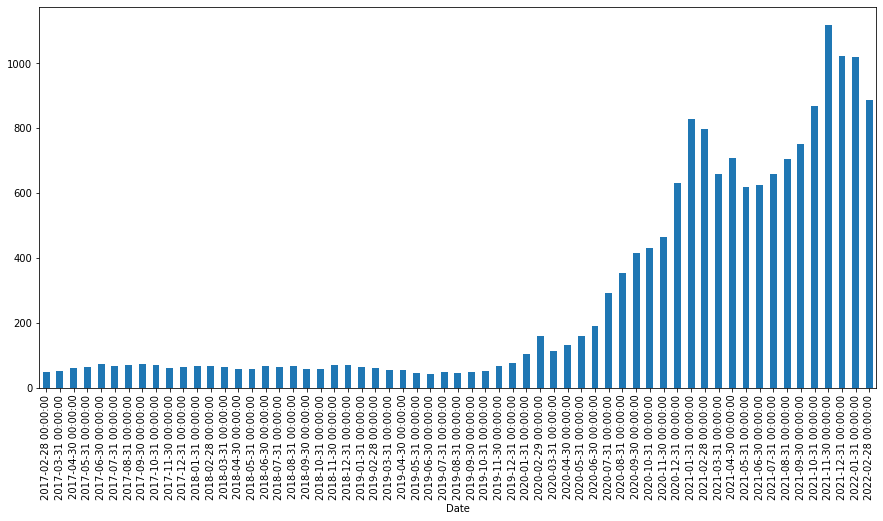

In [75]:
# month end frequency
df['Open'].resample(rule='M').mean().plot(kind='bar', figsize=(15,7))

In [81]:
# Rolling [window=10,center=False,axis=0,method=single]
df['High'].rolling(10).mean().head(20)

Date
2017-02-27        NaN
2017-02-28        NaN
2017-03-01        NaN
2017-03-02        NaN
2017-03-03        NaN
2017-03-06        NaN
2017-03-07        NaN
2017-03-08        NaN
2017-03-09        NaN
2017-03-10    50.2042
2017-03-13    50.1740
2017-03-14    50.3164
2017-03-15    50.4394
2017-03-16    50.6888
2017-03-17    50.9574
2017-03-20    51.2144
2017-03-21    51.4326
2017-03-22    51.5326
2017-03-23    51.7128
2017-03-24    52.0606
Name: High, dtype: float64

In [84]:
df['Open:30 days rolling'] = df['Open'].rolling(10).mean()

In [87]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2017-02-27,49.633999,49.672001,48.402000,49.245998,49.245998,57304000,NaN
2017-02-28,48.838001,50.200001,48.779999,49.998001,49.998001,30390500,NaN
2017-03-01,50.835999,50.970001,49.821999,50.004002,50.004002,24047500,NaN
2017-03-02,49.942001,50.655998,49.653999,50.096001,50.096001,16759000,NaN
2017-03-03,50.147999,50.380001,49.799999,50.313999,50.313999,14597000,NaN


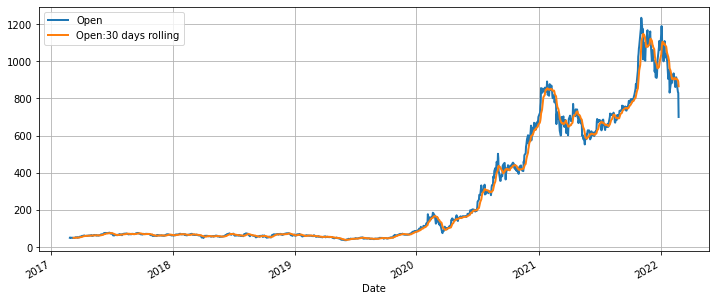

In [92]:
df[['Open', 'Open:30 days rolling']].plot(lw=2,figsize=(12,5))
plt.grid(True)

#orange line is a smouthent version of blue line (without ZIGZAG)

## Assignement
1. read the micosoft data using pandas readers
2. get the max price of the share from 2017 to 2022
3. which is the date of the highest price of the stock
3. which is the date of the lowest price of the stock
